

*   [Section 0: Libraries to import](scrollTo=02amEA_KgZz8)
*   [Section 1: Analysing basic metrics with feature engineering to extract new features](scrollTo=D6Er27ybgw7U)
*   [Section 2: Prophet](scrollTo=Zs0y5g0UBOES)
    1.   [Section 2.1: Without exogenous variable](scrollTo=Faax4t7DE8ei)
    2.   [Section 2.2: With Exogenous variable](scrollTo=tdyJTLouFFJN)
*   [Section 3: Conclusion](scrollTo=Ik0AQjdlkcAZ)







**Problem Statement:** 
1 ad gency company trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

# Section 0: Libraries to import

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import math
from scipy.stats import skew
from scipy.stats import boxcox
from matplotlib import pylab, mlab, pyplot
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#import category_encoders as ce
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import requests
import time
from multiprocessing import cpu_count
from multiprocessing.pool import ThreadPool
from scipy import stats

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
    
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
totaldf=pd.read_csv(r'/content/drive/MyDrive/../Data/train_1.csv')

In [ ]:
totaldf.head(25)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [ ]:
exogdf=pd.read_csv(r'/content/drive/MyDrive/../Data/Exog_Campaign_eng.csv')
exogdf.head(3)

,Exog
0,0
1,0
2,0


# Section 1: Analysing basic metrics with feature engineering to extract new features

In [ ]:
def extractLanguageFrompage(strval):
  arrvals=[]
  if strval =="":
    return strval
  if str.__contains__(strval, '.wikipedia.org'):
    arrvals=strval.lower().split('.wikipedia.org')
  elif str.__contains__(strval, '.wikimedia.org'):
    arrvals=strval.lower().split('.wikimedia.org')
  if len(arrvals)==0:
    return None
  return arrvals[0].split('_')[-1]

In [ ]:
def extractAccesstypeFrompage(strval):
  arrvals=[]
  if strval =="":
    return strval
  if str.__contains__(strval, '.wikipedia.org_'):
    arrvals=strval.lower().split('.wikipedia.org_')
  elif str.__contains__(strval, '.wikimedia.org_'):
    arrvals=strval.lower().split('.wikimedia.org_')
  if len(arrvals)<1:
    return None
  return arrvals[1].split('_')[0]

In [ ]:
def extractOriginFrompage(strval):
  arrvals=[]
  if strval =="":
    return strval
  if str.__contains__(strval, '.wikipedia.org_'):
    arrvals=strval.lower().split('.wikipedia.org_')
  elif str.__contains__(strval, '.wikimedia.org_'):
    arrvals=strval.lower().split('.wikimedia.org_')
  if len(arrvals)<1:
    return None
  return arrvals[1].split('_')[1]

In [ ]:
totaldf['language']=totaldf['Page'].apply(extractLanguageFrompage)


In [ ]:
totaldf['ACCESS_TYPE']=totaldf['Page'].apply(extractAccesstypeFrompage)

In [ ]:
totaldf['ACCESS_ORIGIN']=totaldf['Page'].apply(extractOriginFrompage)

In [ ]:
# these all dont have any language attached to them, we can discard these rows
totaldf=totaldf.loc[~(totaldf['language'].isna())]

In [ ]:
totaldf.fillna(0.0,inplace=True)

In [ ]:
languageAndDateTimeSeries=pd.DataFrame(totaldf.groupby(by='language').agg('sum'))


In [ ]:
languageAndDateTimeSeries=languageAndDateTimeSeries.T.rename_axis('DateVal')
languageAndDateTimeSeries

language,commons,de,en,es,fr,ja,ru,zh
DateVal,,,,,,,,
2015-07-01,1140821.0,13260519.0,84712190.0,15278553.0,8458638.0,11863200.0,9463854.0,4144988.0
2015-07-02,1178130.0,13079896.0,84438545.0,14601013.0,8512952.0,13620792.0,9627643.0,4151189.0
2015-07-03,1150547.0,12554042.0,80167728.0,13427632.0,8186030.0,12305383.0,8923463.0,4123659.0
2015-07-04,951317.0,11520379.0,83463204.0,12606538.0,8749842.0,15456239.0,8393214.0,4163448.0
2015-07-05,1058036.0,13392347.0,86198637.0,13710356.0,8590493.0,14827204.0,8938528.0,4441286.0
...,...,...,...,...,...,...,...,...
2016-12-27,2305363.0,20125264.0,145628731.0,15945353.0,15281470.0,16123301.0,15040168.0,6478442.0
2016-12-28,2599015.0,19152389.0,141278366.0,16577375.0,13781521.0,16150715.0,14000319.0,6513400.0
2016-12-29,2309293.0,18447906.0,150557534.0,15647135.0,13399796.0,17682688.0,13478977.0,6042545.0


# Section 2: Prophet

In [ ]:
inputlanguage='en'

In [ ]:
datadf=languageAndDateTimeSeries[inputlanguage]
datadf.drop(columns=['language'],inplace=True)
datadf.columns=['viewsperday']
datadf=datadf.reset_index()
datadf.columns=['ds','y']     #required columns names for date and target variable as per library

In [ ]:
datadf['holiday']=exogdf['Exog']

In [ ]:
datadf.head()

,ds,y,holiday
0,2015-07-01,84712190.0,0
1,2015-07-02,84438545.0,0
2,2015-07-03,80167728.0,0
3,2015-07-04,83463204.0,0
4,2015-07-05,86198637.0,0


# Section 2.1: Without exogenous variable

In [ ]:
from prophet import Prophet   # from fbprophet import Prophet

prophetobject = Prophet()
prophetobject.fit(datadf[['ds', 'y']][:-50])

future = prophetobject.make_future_dataframe(periods=50, freq="D")
forecast = prophetobject.predict(future)
forecast.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpohnam1iw/frsb68of.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpohnam1iw/62yqnrw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60648', 'data', 'file=/tmp/tmpohnam1iw/frsb68of.json', 'init=/tmp/tmpohnam1iw/62yqnrw5.json', 'output', 'file=/tmp/tmpohnam1iw/prophet_modelrpl2ws8j/prophet_model-20230213135615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:56:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,8.277409e+07,6.400445e+07,1.037278e+08,8.277409e+07,8.277409e+07,3.134499e+04,3.134499e+04,3.134499e+04,3.134499e+04,3.134499e+04,3.134499e+04,0.0,0.0,0.0,8.280543e+07
1,2015-07-02,8.285416e+07,5.852645e+07,1.013558e+08,8.285416e+07,8.285416e+07,-2.557271e+06,-2.557271e+06,-2.557271e+06,-2.557271e+06,-2.557271e+06,-2.557271e+06,0.0,0.0,0.0,8.029689e+07
2,2015-07-03,8.293423e+07,5.662097e+07,9.936951e+07,8.293423e+07,8.293423e+07,-5.525593e+06,-5.525593e+06,-5.525593e+06,-5.525593e+06,-5.525593e+06,-5.525593e+06,0.0,0.0,0.0,7.740863e+07
3,2015-07-04,8.301430e+07,5.781904e+07,1.008124e+08,8.301430e+07,8.301430e+07,-3.902029e+06,-3.902029e+06,-3.902029e+06,-3.902029e+06,-3.902029e+06,-3.902029e+06,0.0,0.0,0.0,7.911227e+07
4,2015-07-05,8.309437e+07,6.350346e+07,1.081701e+08,8.309437e+07,8.309437e+07,3.033452e+06,3.033452e+06,3.033452e+06,3.033452e+06,3.033452e+06,3.033452e+06,0.0,0.0,0.0,8.612782e+07


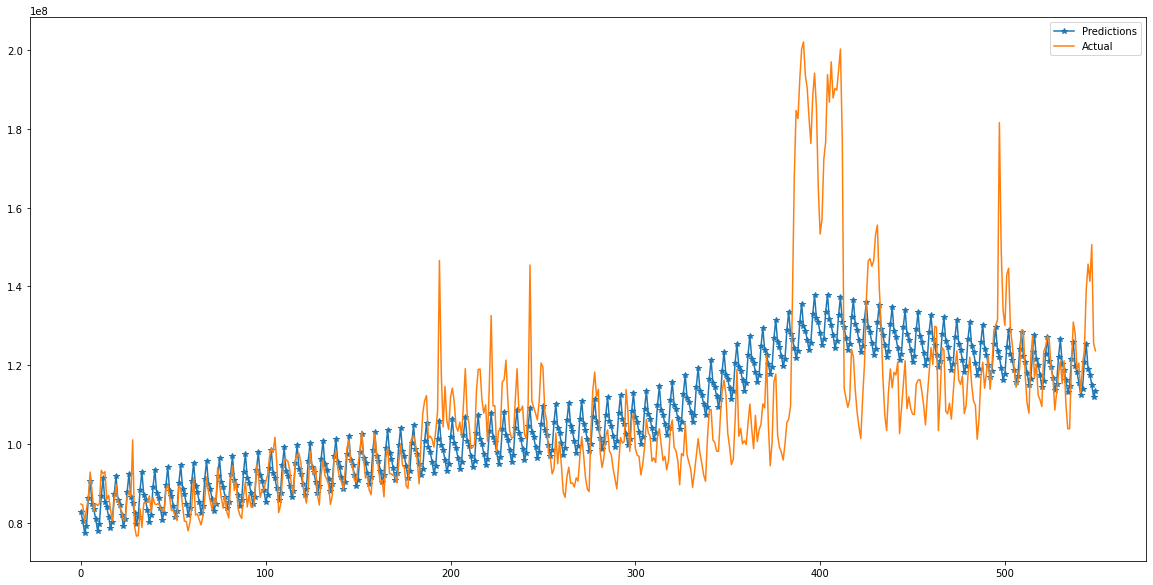

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(forecast['yhat'],'-*', label = 'Predictions')
plt.plot(datadf['y'], label = 'Actual')
plt.legend()
plt.show()

In [ ]:
performance(datadf['y'][:-50],forecast['yhat'][:-50])

MAE : 10695847.879
RMSE : 16649389.183
MAPE: 0.09


# Section 2.2: With Exogenous variable

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpohnam1iw/qqxitco2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpohnam1iw/m13oadsn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87542', 'data', 'file=/tmp/tmpohnam1iw/qqxitco2.json', 'init=/tmp/tmpohnam1iw/m13oadsn.json', 'output', 'file=/tmp/tmpohnam1iw/prophet_modelh0jagukv/prophet_model-20230213140312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:03:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:03:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


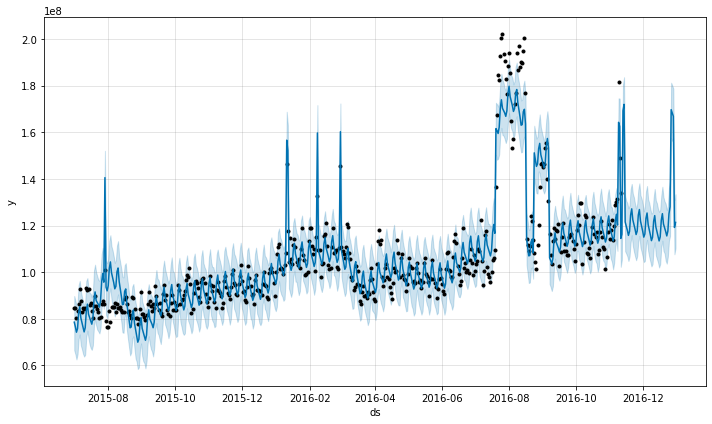

In [ ]:
model2=Prophet(yearly_seasonality=True, weekly_seasonality=True)
model2.add_regressor('holiday') #adding holidays data
model2.fit(datadf[:-50])
forecast2 = model2.predict(datadf)
fig = model2.plot(forecast2)

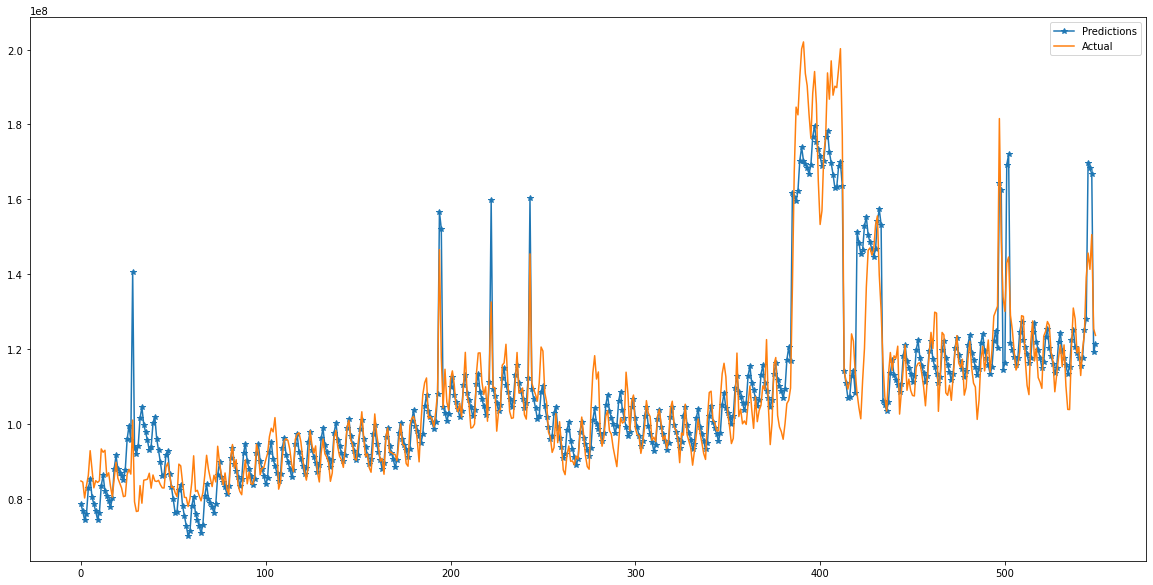

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(forecast2['yhat'],'-*', label = 'Predictions')
plt.plot(datadf['y'], label = 'Actual')
plt.legend()
plt.show()

In [ ]:
performance(datadf['y'][:-50],forecast2['yhat'][:-50])

MAE : 5882691.722
RMSE : 8980871.746
MAPE: 0.054


**Conclusion:**

Insight: with exogenous variable addition MAPE for en language time series improved from 9% to 5.4% and observed through plots as well, how variation is predicted well with holiday feature addition.